# Software development progress indicators

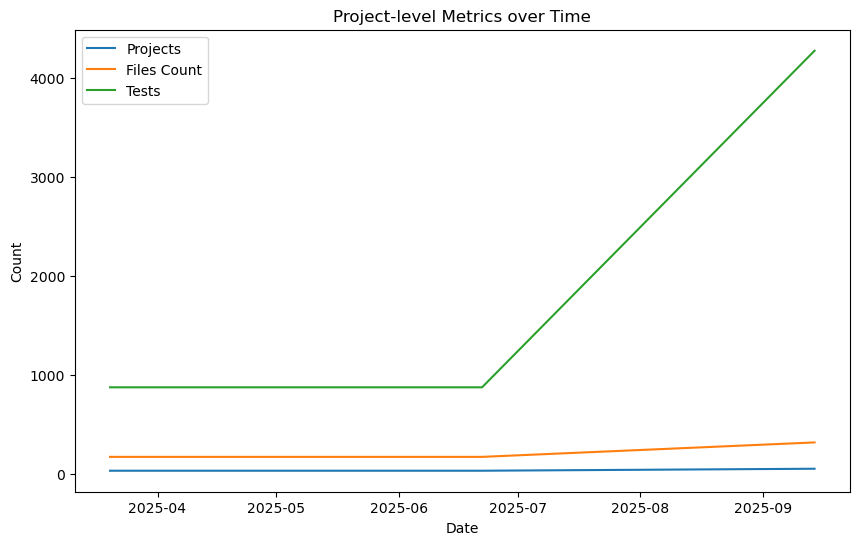

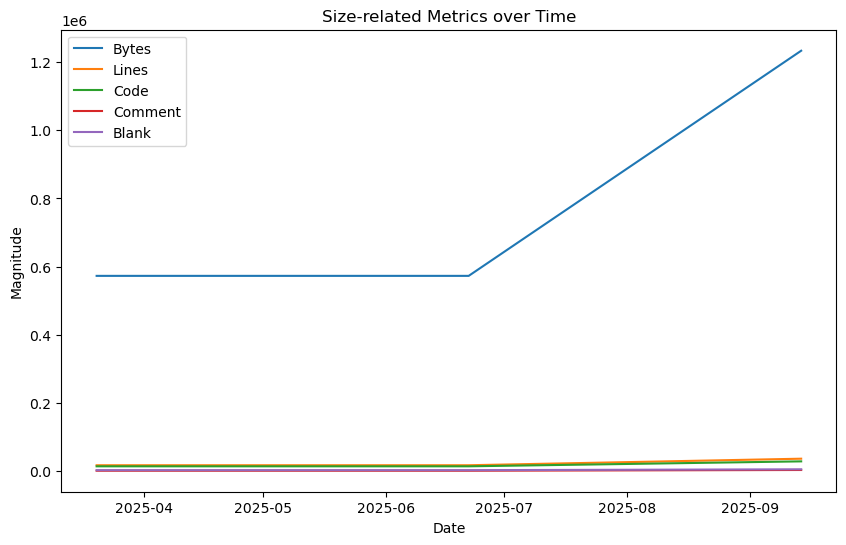

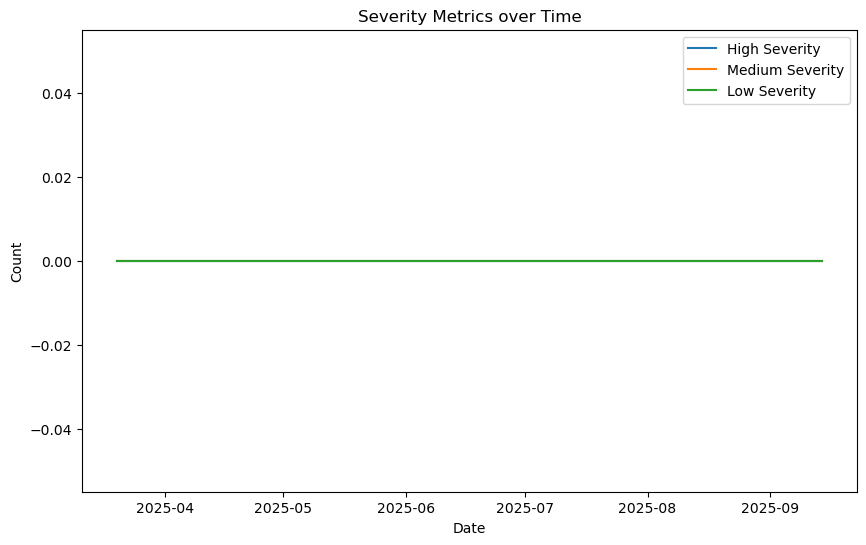

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

# Step 1: Load all matching files
file_pattern = "data/dart-package-*.json"
file_paths = glob.glob(file_pattern)

records = []
for path in file_paths:
    with open(path, "r") as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    df["source_file"] = path
    records.append(df)

raw_df = pd.concat(records, ignore_index=True)

# Step 2: Convert Date to datetime
raw_df["Date"] = pd.to_datetime(raw_df["Date"])

# Step 3: Aggregate by date (summing across languages per snapshot)
metrics_to_aggregate = [
    "Projects", "Count", "tests",
    "Bytes", "Lines", "Code", "Comment", "Blank",
    "severity_high", "severity_medium", "severity_low"
]

agg_df = raw_df.groupby("Date")[metrics_to_aggregate].sum().reset_index()

# Step 4: Plot project-level metrics
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x="Date", y="Projects", label="Projects")
sns.lineplot(data=agg_df, x="Date", y="Count", label="Files Count")
sns.lineplot(data=agg_df, x="Date", y="tests", label="Tests")
plt.title("Project-level Metrics over Time")
plt.ylabel("Count")
plt.legend()
plt.show()

# Step 5: Plot size-related metrics
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x="Date", y="Bytes", label="Bytes")
sns.lineplot(data=agg_df, x="Date", y="Lines", label="Lines")
sns.lineplot(data=agg_df, x="Date", y="Code", label="Code")
sns.lineplot(data=agg_df, x="Date", y="Comment", label="Comment")
sns.lineplot(data=agg_df, x="Date", y="Blank", label="Blank")
plt.title("Size-related Metrics over Time")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Step 6: Plot severity metrics
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x="Date", y="severity_high", label="High Severity")
sns.lineplot(data=agg_df, x="Date", y="severity_medium", label="Medium Severity")
sns.lineplot(data=agg_df, x="Date", y="severity_low", label="Low Severity")
plt.title("Severity Metrics over Time")
plt.ylabel("Count")
plt.legend()
plt.show()
